# Exploring Visualizations for the Medicare Part D Data

We're going to explore the Medicare Part D data using the VA classifications to find out what the most prescribed drug classes are and what the most expensive drug classes are, then we can go from there.

### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

### The Data

We're going to need the Medicare Part D data. Let's start just with one year, the last one:

In [2]:
partd = pd.read_csv('https://query.data.world/s/do73dnhtplgxpfdb9j0y11mzg')

In [3]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome
0,0,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891
1,1,1ST TIER UNIFINE PENTIPS PLUS,"PEN NEEDLE, DIABETIC",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776
2,2,ABACAVIR,ABACAVIR SULFATE,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343
3,3,ABACAVIR-LAMIVUDINE-ZIDOVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428
4,4,ABELCET,AMPHOTERICIN B LIPID COMPLEX,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000


Let's make the drug names lowercase:

In [4]:
partd.drugname_brand = partd.drugname_brand.str.lower()

In [5]:
partd.drugname_generic = partd.drugname_generic.str.lower()

In [6]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome
0,0,1st tier unifine pentips,"pen needle, diabetic",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891
1,1,1st tier unifine pentips plus,"pen needle, diabetic",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776
2,2,abacavir,abacavir sulfate,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343
3,3,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428
4,4,abelcet,amphotericin b lipid complex,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000


Let's load the drug uses. There are some that we got from `data.world`, there's also the VA classification. Let's look at the VA classification, which we have already associated with drug names (they currently live locally):

In [7]:
druguse = pd.read_csv("../../data/drugnames_withclasses.csv", sep="\t")

In [8]:
druguse.head()

,#drugname_brand,drugname_generic,RXCUI,drug_major_class,dmc_string,drug_class,dc_string,dmc_name,dc_name
0,10 wash,sulfacetamide sodium,10169,0|DE000|OP000,NaN,0|DE101|OP210,NaN,UNKNOWN/MISSING|DERMATOLOGICAL AGENTS|OPHTHALM...,"UNKNOWN/MISSING|ANTI-INFECTIVE,TOPICAL|ANTI-IN..."
1,1st tier unifine pentips,"pen needle, diabetic",0.0,0,NaN,0,NaN,UNKNOWN/MISSING,UNKNOWN/MISSING
2,1st tier unifine pentips plus,"pen needle, diabetic",0.0,0,NaN,0,NaN,UNKNOWN/MISSING,UNKNOWN/MISSING
3,60pse-400gfn-20dm,guaifenesin/dm/pseudoephedrine,5032|8896,RE000,NaN,RE200|RE302,NaN,RESPIRATORY TRACT MEDICATIONS,"DECONGESTANTS,SYSTEMIC|ANTITUSSIVES/EXPECTORANTS"
4,8-mop,methoxsalen,6854|227713,DE000,NaN,DE810,NaN,DERMATOLOGICAL AGENTS,ANTIPSORIATIC


Let's make empty columns for the drug major and minor classes and their names:

In [9]:
partd["drug_major_class"] = ""
partd["drug_class"] = ""
partd["dmc_name"] = ""
partd["dc_name"] = ""

In [10]:
for idx in partd.index:
    r = partd.loc[idx]
    druguse_loc = druguse[druguse["#drugname_brand"] == r.drugname_brand].index
    partd.loc[idx, "drug_major_class"] = druguse.loc[druguse_loc[0], "drug_major_class"]
    partd.loc[idx, "drug_class"] = druguse.loc[druguse_loc[0], "drug_class"]
    partd.loc[idx, "dmc_name"] = druguse.loc[druguse_loc[0], "dmc_name"]
    partd.loc[idx, "dc_name"] = druguse.loc[druguse_loc[0], "dc_name"]

In [11]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome,drug_major_class,drug_class,dmc_name,dc_name
0,0,1st tier unifine pentips,"pen needle, diabetic",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
1,1,1st tier unifine pentips plus,"pen needle, diabetic",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
2,2,abacavir,abacavir sulfate,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
3,3,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
4,4,abelcet,amphotericin b lipid complex,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000,0,0,0,0


Ok, cool! Let's try to take one particular class of drugs and look at that. 

In [18]:
d = partd[partd["dmc_name"] == "ANTIMICROBIALS"]

**Note**: That currently does not include any drugs that have **more than one string**. I need to fix that later!

In [22]:
d.sum(axis=0)

Unnamed: 0                                                                    361002
drugname_brand                     abacavirabacavir-lamivudine-zidovudineaczonead...
drugname_generic                   abacavir sulfateabacavir/lamivudine/zidovudine...
claim_count                                                                 32796792
total_spending                                                             5.604e+09
user_count                                                               1.90962e+07
total_spending_per_user                                                       573654
unit_count                                                               1.06532e+09
unit_cost_wavg                                                               3432.53
user_count_non_lowincome                                                 1.18441e+07
out_of_pocket_avg_non_lowincome                                              60351.9
user_count_lowincome                                             

In [32]:
partd.head()

,Unnamed: 0,drugname_brand,drugname_generic,claim_count,total_spending,user_count,total_spending_per_user,unit_count,unit_cost_wavg,user_count_non_lowincome,out_of_pocket_avg_non_lowincome,user_count_lowincome,out_of_pocket_avg_lowincome,drug_major_class,drug_class,dmc_name,dc_name
0,0,1st tier unifine pentips,"pen needle, diabetic",10749,257895.63,5173.0,49.854172,1335132.0,0.193205,2878.0,27.305271,2295.0,3.987891,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
1,1,1st tier unifine pentips plus,"pen needle, diabetic",2943,73396.65,1470.0,49.929694,369886.0,0.198430,710.0,28.071930,760.0,3.510776,0,0,UNKNOWN/MISSING,UNKNOWN/MISSING
2,2,abacavir,abacavir sulfate,69216,24578834.46,9319.0,2637.496991,4424163.0,5.555590,2046.0,236.941960,7273.0,6.146343,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
3,3,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,12216,16626213.80,1621.0,10256.763603,759933.0,21.878526,377.0,945.154324,1244.0,24.187428,AM000,AM800,ANTIMICROBIALS,ANTIVIRALS
4,4,abelcet,amphotericin b lipid complex,439,552847.75,102.0,5420.075980,47600.0,11.614449,68.0,303.140000,34.0,31.550000,0,0,0,0


In [89]:
claim_count = partd.groupby(by="dmc_name", as_index=False)["claim_count"].sum()
claim_count.set_index("dmc_name", drop=True, inplace=True)

In [93]:
claim_count

,claim_count
dmc_name,
0,79883523
"ANTIDOTES,DETERRENTS AND POISON CONTROL",478026
ANTIHISTAMINES,3361473
ANTIHISTAMINES|RESPIRATORY TRACT MEDICATIONS,3858
ANTIMICROBIALS,32796792
ANTIMICROBIALS|CENTRAL NERVOUS SYSTEM MEDICATIONS,3972867
ANTIMICROBIALS|DERMATOLOGICAL AGENTS,4043446
ANTIMICROBIALS|DERMATOLOGICAL AGENTS|GENITOURINARY MEDICATIONS,2072824
ANTIMICROBIALS|DERMATOLOGICAL AGENTS|OPHTHALMIC AGENTS,1145590


In [75]:
total_spending = partd.groupby(by="dmc_name", as_index=False)["total_spending"].sum()
total_spending.set_index("dmc_name", drop=True, inplace=True)

user_count = partd.groupby(by="dmc_name", as_index=False)["user_count"].sum()
user_count.set_index("dmc_name", drop=True, inplace=True)

total_spending_per_user = partd.groupby(by="dmc_name", as_index=False)["total_spending_per_user"].mean()
total_spending_per_user.set_index("dmc_name", drop=True, inplace=True)

unit_count = partd.groupby(by="dmc_name", as_index=False)["unit_count"].sum()
unit_count.set_index("dmc_name", drop=True, inplace=True)

unit_cost_wavg = partd.groupby(by="dmc_name", as_index=False)["unit_cost_wavg"].mean()
unit_cost_wavg.set_index("dmc_name", drop=True, inplace=True)

user_count_non_lowincome = partd.groupby(by="dmc_name", as_index=False)["user_count_non_lowincome"].sum()
user_count_non_lowincome.set_index("dmc_name", drop=True, inplace=True)

out_of_pocket_avg_non_lowincome = partd.groupby(by="dmc_name", as_index=False)["out_of_pocket_avg_non_lowincome"].mean()
out_of_pocket_avg_non_lowincome.set_index("dmc_name", drop=True, inplace=True)

user_count_lowincome = partd.groupby(by="dmc_name", as_index=False)["user_count_lowincome"].sum()
user_count_lowincome.set_index("dmc_name", drop=True, inplace=True)

out_of_pocket_avg_lowincome = partd.groupby(by="dmc_name", as_index=False)["out_of_pocket_avg_lowincome"].mean()
out_of_pocket_avg_lowincome.set_index("dmc_name", drop=True, inplace=True)



In [96]:
claim_count.index.name = "dmc_name"

In [97]:
user_count_lowincome.head()

,user_count_lowincome
dmc_name,
0,8573645.0
"ANTIDOTES,DETERRENTS AND POISON CONTROL",129704.0
ANTIHISTAMINES,616189.0
ANTIHISTAMINES|RESPIRATORY TRACT MEDICATIONS,400.0
ANTIMICROBIALS,7251605.0


In [85]:
dfs = [claim_count,
       total_spending,
       user_count,
       total_spending_per_user,
       unit_count,
       unit_cost_wavg,
       user_count_non_lowincome,
       out_of_pocket_avg_non_lowincome, 
       user_count_lowincome, 
       out_of_pocket_avg_lowincome]

In [99]:
from functools import reduce
partd_grouped = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs)

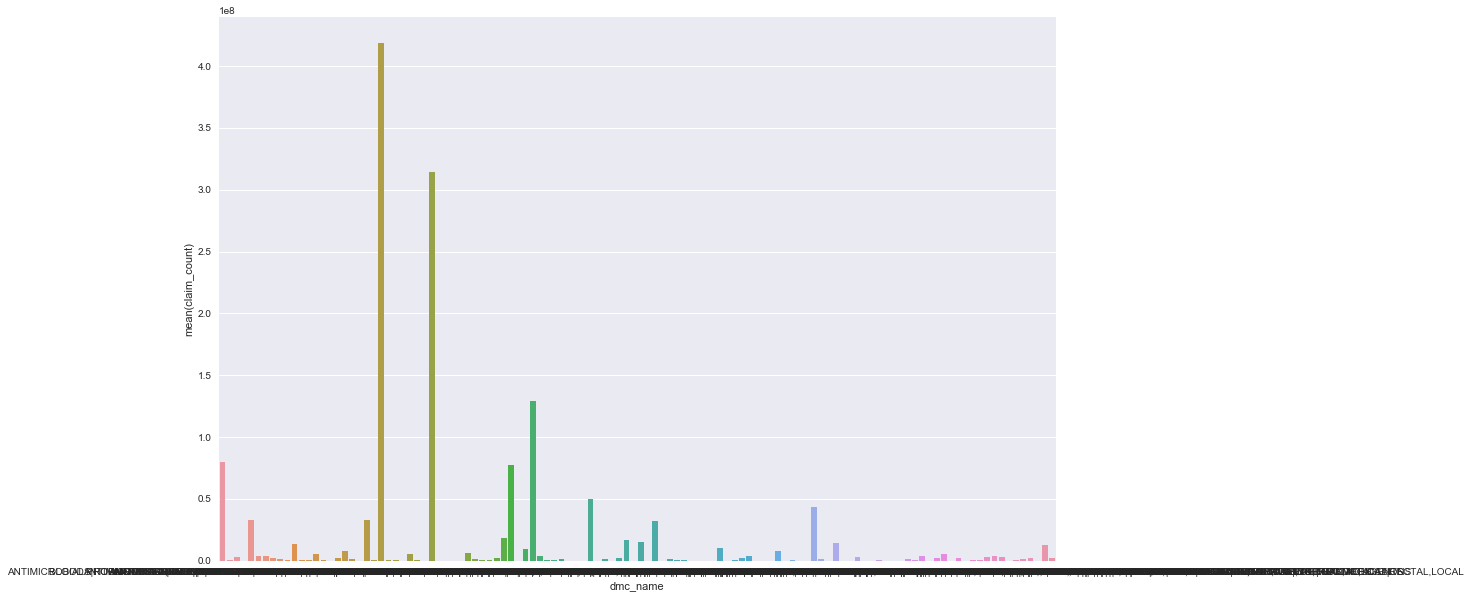

In [112]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.barplot(partd_grouped.index, partd_grouped["claim_count"], ax=ax)

### Which medications are claimed most often?

